## DA_Fall21_HW_2 
### Due Date: 11/11 before Mid-night
### Linear Regression and Logistisc Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Part 1 of this HW is on building a Linear Regression model using housing data and a Logistic Regression model.

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [2]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


***Follow the standard way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

In [3]:
housing.shape

(5000, 7)

In [4]:
housing.isnull().any()

Income                  False
HouseAge                False
NumberOfRooms           False
AreaNumberOfBedrooms    False
Population              False
Price                   False
Address                 False
dtype: bool

<AxesSubplot:xlabel='Income', ylabel='Price'>

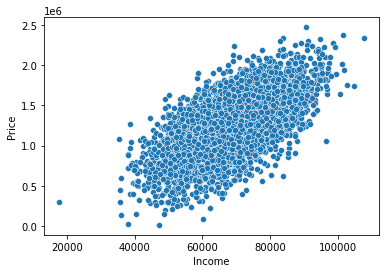

In [5]:
sns.scatterplot(x="Income", y="Price", data=housing)

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

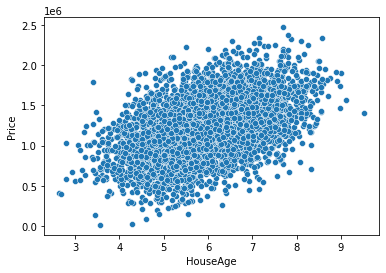

In [6]:
sns.scatterplot(x="HouseAge", y="Price", data=housing)

<AxesSubplot:xlabel='NumberOfRooms', ylabel='Price'>

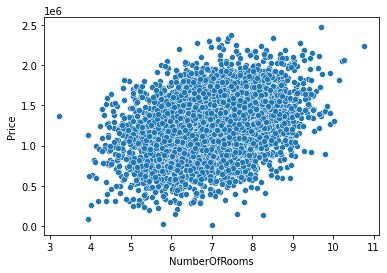

In [7]:
sns.scatterplot(x="NumberOfRooms", y="Price", data=housing)

<AxesSubplot:xlabel='AreaNumberOfBedrooms', ylabel='Price'>

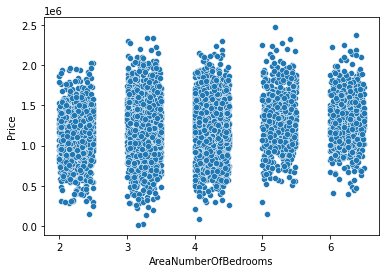

In [8]:
sns.scatterplot(x="AreaNumberOfBedrooms", y="Price", data=housing)

<AxesSubplot:xlabel='Population', ylabel='Price'>

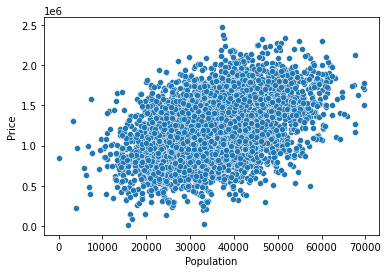

In [9]:
sns.scatterplot(x="Population", y="Price", data=housing)

In [10]:
housing.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


Based on the scatterplots and correlation, it is clear that the most important variable that explains house price is income. We will therefore use Price and Income as the variables to build our Linear Regression model.

In [11]:
Xarray = housing["Income"].values
Yarray = housing["Price"].values

In [12]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)

print(model.intercept_)
print(model.coef_)

[-224617.80110797]
[[21.24368249]]


In [15]:
Y_pred = model.predict(X_test)

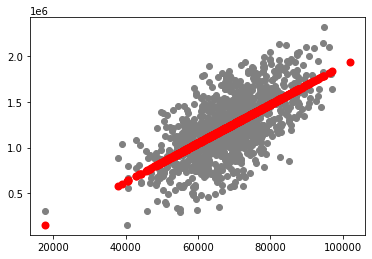

In [16]:
plt.scatter(X_test, Y_test, color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [17]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 219728.3360181176
Mean Squared Error: 74084394120.77266
Root Mean Squared Error: 272184.4854520049
R-squared: 0.4006059806785851


10-Fold Cross Validation Below:

In [18]:
import random

rsquare = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_)) 

Trial 0, R-squared: 0.4264815980173504,  Slope: [[21.05289948]], Intercept: [-213299.76441802],  
Trial 1, R-squared: 0.44093106682330485,  Slope: [[21.01383775]], Intercept: [-207386.74088971],  
Trial 2, R-squared: 0.4421555608027685,  Slope: [[20.97676946]], Intercept: [-205801.41091181],  
Trial 3, R-squared: 0.4238637738049119,  Slope: [[20.9678242]], Intercept: [-205142.40539351],  
Trial 4, R-squared: 0.4398632375163739,  Slope: [[20.98434133]], Intercept: [-211232.01846454],  
Trial 5, R-squared: 0.3981863835657905,  Slope: [[21.3005]], Intercept: [-226991.84948515],  
Trial 6, R-squared: 0.4054397951744082,  Slope: [[21.12280078]], Intercept: [-218300.90876248],  
Trial 7, R-squared: 0.38890951535924967,  Slope: [[21.28396697]], Intercept: [-225274.73267415],  
Trial 8, R-squared: 0.4099740533533893,  Slope: [[21.13641164]], Intercept: [-216590.94651305],  
Trial 9, R-squared: 0.38841381588833723,  Slope: [[21.39447864]], Intercept: [-237521.9614576],  


In [19]:
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.426482
1,1,0.440931
2,2,0.442156
3,3,0.423864
4,4,0.439863
5,5,0.398186
6,6,0.405440
7,7,0.388910
8,8,0.409974
9,9,0.388414


<AxesSubplot:xlabel='trial'>

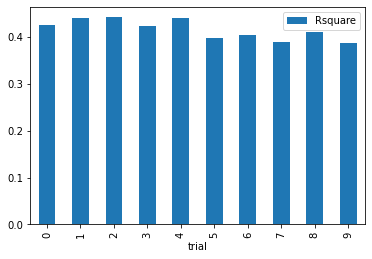

In [20]:
rdf.plot.bar(x='trial', y='Rsquare')

In [21]:
print(rdf['Rsquare'].mean())

0.41642188003058844


We can say that this model passes the 10 fold cross validation test, since the performance metrics, slope, and intercept do not change by a large amount from one trial to another. For example, the r-squared value (as shown above in the graph) varies by a very small amount between each trial. This means that the model is resistant to changes in the data. However, the model itself isn't very useful, since it has an r-squared value of around 0.4, while something 0.7 or greater would be more ideal. Therefore, by adding more variables to the model, we can increase the r-squared value.

Adding an Additional Variable: I chose to add the next variable with the largest correlation to home price - HouseAge - to the model. By adding this variable, the model should be able to predict home prices more accurately since HouseAge and Income both have the highest correlation with home price.

In [22]:
Xarray = housing[['Income', 'HouseAge']].values
Yarray = housing["Price"].values

In [23]:
X = Xarray.reshape(-1, 2)
Y = Yarray.reshape(-1, 1)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)

[-1181216.65021218]
[[2.12204386e+01 1.60427782e+05]]


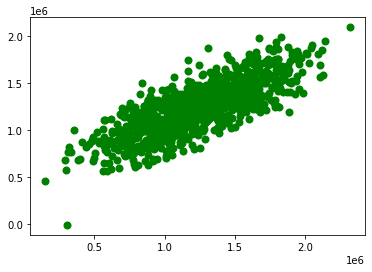

In [25]:
plt.scatter(Y_test, Y_pred, color='green', linewidth=2)
plt.show()

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 175582.84518684636
Mean Squared Error: 48062437588.67756
Root Mean Squared Error: 219231.47034282636
R-squared: 0.6111416177920193


In [27]:
import random

rsquare = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_)) 

Trial 0, R-squared: 0.5956878165345836,  Slope: [[2.12141035e+01 1.62849831e+05]], Intercept: [-1197646.46599544],  
Trial 1, R-squared: 0.6106554951699555,  Slope: [[2.13510802e+01 1.61902608e+05]], Intercept: [-1199680.19406438],  
Trial 2, R-squared: 0.5860119754276357,  Slope: [[2.12068967e+01 1.62369216e+05]], Intercept: [-1192505.93839168],  
Trial 3, R-squared: 0.6249559668097133,  Slope: [[2.10110673e+01 1.62965747e+05]], Intercept: [-1183561.47482063],  
Trial 4, R-squared: 0.6077696506422949,  Slope: [[2.12632698e+01 1.62324837e+05]], Intercept: [-1194948.69752093],  
Trial 5, R-squared: 0.6020278319407937,  Slope: [[2.10732665e+01 1.61232176e+05]], Intercept: [-1177665.03311053],  
Trial 6, R-squared: 0.6173942677825255,  Slope: [[2.12765762e+01 1.62273567e+05]], Intercept: [-1195632.17473106],  
Trial 7, R-squared: 0.607884291052097,  Slope: [[2.13754607e+01 1.60208187e+05]], Intercept: [-1189392.56157577],  
Trial 8, R-squared: 0.6173597732678248,  Slope: [[2.10427113e+01 

In [28]:
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.595688
1,1,0.610655
2,2,0.586012
3,3,0.624956
4,4,0.607770
5,5,0.602028
6,6,0.617394
7,7,0.607884
8,8,0.617360
9,9,0.631079


<AxesSubplot:xlabel='trial'>

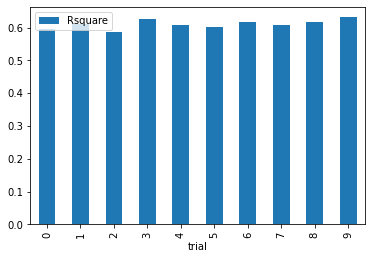

In [29]:
rdf.plot.bar(x='trial', y='Rsquare')

In [30]:
print(rdf['Rsquare'].mean())

0.6100826515362355


After adding HouseAge to the model, the r-squared value increases to 0.6 on average. This is a great improvement over the original model that only included Income, that had an r-squared value of 0.4 on average.

### Part 2: Build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of this part of the HW is to see if one can predict
whether a woman on given certain attributeds, such as age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [31]:
# Load the dataset
df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [32]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [33]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [34]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


In [35]:
# Now we can drop the original affairs variable
df.drop(['affairs'], inplace=True, axis=1)

In [36]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1


### let's group by has or no affairs rows

In [37]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb
had_affair,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758
1,3.619555,30.537019,10.770389,1.686515,2.290547,13.876274,3.796108


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

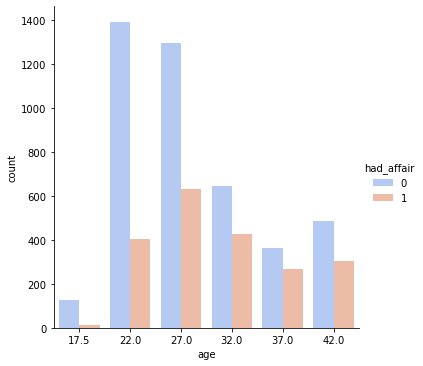

In [38]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

***Follow the standard proper way of building a model and in particular,***

1. Use the season heatmap to find if there are missing values. You can just drop those rows if there are not too many of them
2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
3. Build Logistic Regression model with all the numerical variables.
4. Print out the model performance metrics (precision/recall)
5. Do a countplot on the categorical variables
6. Call the get_dummies method to create the dummies variables for the categorical variables
7. Build another Logistic Regression model that include these dummies variabes.
8. Comment on your results based on the performance metrics

<AxesSubplot:>

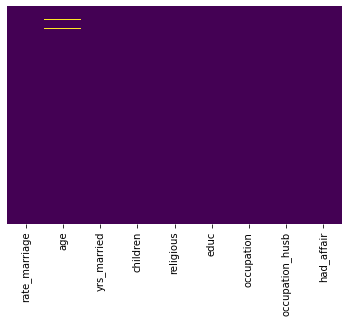

In [39]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [40]:
df["age"]

0       32.0
1       27.0
2       22.0
3       37.0
4       27.0
        ... 
6466    32.0
6467    32.0
6468    22.0
6469    32.0
6470    22.0
Name: age, Length: 6471, dtype: float64

In [41]:
df["age"].isna().sum()

105

In [42]:
(105/6471) * 100

1.6226240148354196

There are 6,471 cells in the age column, and 105 of them have missing values. This is about 1.6% of the age column, therefore meaning that the missing values only make up a small amount of the column. These rows with missing data will be dropped.

<AxesSubplot:>

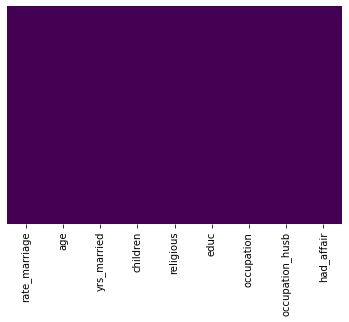

In [43]:
df = df.dropna()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [44]:
df.isna().any()

rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
had_affair         False
dtype: bool

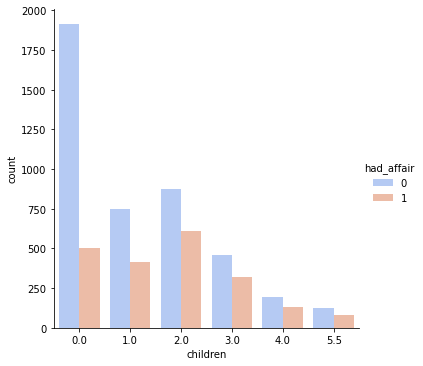

In [45]:
sns.factorplot('children', kind='count', hue='had_affair', data=df, palette='coolwarm')

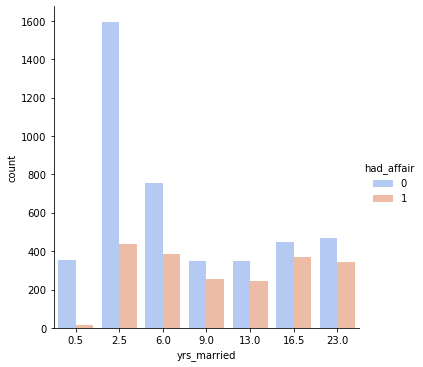

In [46]:
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df, palette='coolwarm')

Based on the two factor plots above, we can see that the ratios between a woman having an affair and not having an affair become much closer together the more years a couple has been married, and the more children they have. In other words, the chances of an affair increase as the number of children increase, and as the years married increase.

In [47]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1


Based on the above chart and data set description, the numerical variables in this data set are age, yrs_married, and children. I will now build a Logistic Regression model using these variables.

In [48]:
XArray = df[["age", "yrs_married", "children"]].values
YArray = df["had_affair"].values

X = XArray.reshape(-1, 3)
Y = YArray.reshape(-1, 1)

In [49]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [50]:
predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       885
           1       0.38      0.17      0.23       389

    accuracy                           0.66      1274
   macro avg       0.54      0.52      0.51      1274
weighted avg       0.61      0.66      0.62      1274

0.6632653061224489


This model has a 66% accuracy score on average, which isn't terrible. However, the metrics for the row labeled "1" are rather poor, with a low precision, recall, and f1-score. Therefore, we can almost certainly increase the accuracy of the model by adding the categorical variables in. These categorical variables are "rate_marriage", "religious", "educ", "occupation", and "occupation_husb". 

<AxesSubplot:xlabel='had_affair', ylabel='count'>

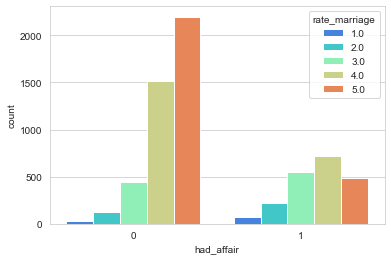

In [52]:
sns.set_style("whitegrid")
sns.countplot(x="had_affair", hue="rate_marriage", data=df, palette="rainbow")

<AxesSubplot:xlabel='had_affair', ylabel='count'>

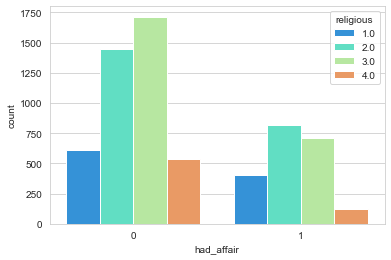

In [53]:
sns.countplot(x="had_affair", hue="religious", data=df, palette="rainbow")

<AxesSubplot:xlabel='had_affair', ylabel='count'>

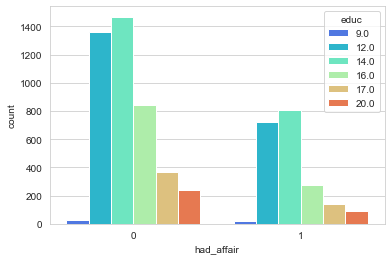

In [54]:
sns.countplot(x="had_affair", hue="educ", data=df, palette="rainbow")

<AxesSubplot:xlabel='had_affair', ylabel='count'>

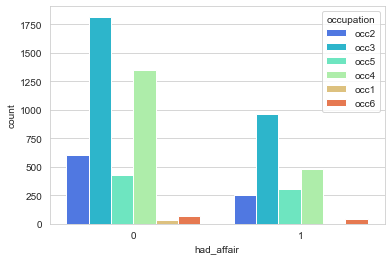

In [55]:
sns.countplot(x="had_affair", hue="occupation", data=df, palette="rainbow")

<AxesSubplot:xlabel='had_affair', ylabel='count'>

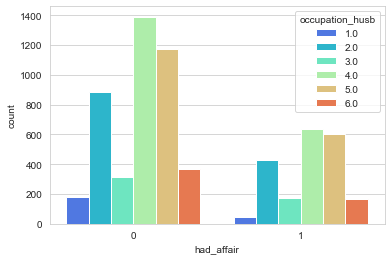

In [56]:
sns.countplot(x="had_affair", hue="occupation_husb", data=df, palette="rainbow")

In [57]:
dummy = pd.get_dummies(df, prefix='', prefix_sep='', drop_first=True,
        columns=['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb'])

In [58]:
dummy.head()

,age,yrs_married,children,had_affair,2.0,3.0,4.0,5.0,2.0,3.0,...,occ2,occ3,occ4,occ5,occ6,2.0,3.0,4.0,5.0,6.0
0,32.0,9.0,3.0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [59]:
XArray = dummy[dummy.columns.difference(['had_affair'])].values
YArray = dummy["had_affair"].values

X = XArray.reshape(-1, 25)
Y = YArray.reshape(-1, 1)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       885
           1       0.60      0.37      0.45       389

    accuracy                           0.73      1274
   macro avg       0.68      0.63      0.64      1274
weighted avg       0.71      0.73      0.71      1274

0.7315541601255887


By adding in all of the categorical variables to our model, we end up with a model with 73% accuracy. This is a clear improvement over the model without the categorical variables, that had an accuracy of around 66%. Not only that, in the "1" case, the precision, recall, and f1-score are all drastically improved over the model without the categorical variables. This proves that by providing the model with more information, we were able to significantly improve our performance metrics. 